In [41]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

train_data = pd.read_csv('TrainTable.csv')
test_data = pd.read_csv('TestTable.csv')

In [42]:
train_data.head(3)

,head,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle,action
0,"['48.0', '52.0', '1']","['25.333333333333332', '80.66666666666666', '1']","['68.0', '72.66666666666666', '0']","['36.0', '106.0', '1']","['83.33333333333333', '108.0', '1']","['64.66666666666666', '81.33333333333333', '1']","['81.33333333333333', '81.33333333333333', '1']","['36.0', '140.0', '1']","['67.33333333333333', '150.0', '1']","['48.666666666666664', '202.0', '1']","['67.33333333333333', '200.0', '1']","['28.0', '260.0', '1']","['69.33333333333333', '247.33333333333331', '1']",baseball_pitch
1,"['178.0', '38.0', '1']","['153.33333333333331', '62.0', '1']","['193.33333333333331', '61.33333333333333', '1']","['140.66666666666666', '94.0', '1']","['202.0', '94.66666666666666', '1']","['155.33333333333331', '80.66666666666666', '1']","['175.33333333333331', '77.33333333333333', '1']","['158.66666666666666', '112.66666666666666', '1']","['191.33333333333331', '119.33333333333333', '1']","['158.66666666666666', '171.33333333333331', '1']","['193.33333333333331', '172.66666666666666', '1']","['202.66666666666666', '219.33333333333331', '1']","['150.0', '215.33333333333331', '1']",baseball_pitch
2,"['192.0', '36.0', '1']","['176.0', '70.66666666666666', '0']","['205.33333333333331', '64.0', '1']","['168.0', '97.33333333333333', '1']","['192.66666666666666', '96.66666666666666', '1']","['142.66666666666666', '79.33333333333333', '0']","['162.66666666666666', '80.66666666666666', '1']","['171.33333333333331', '130.0', '0']","['203.33333333333331', '130.0', '1']","['177.33333333333331', '173.33333333333331', '0']","['201.33333333333331', '176.0', '1']","['190.66666666666666', '225.33333333333331', '0']","['214.66666666666666', '236.66666666666666', '1']",baseball_pitch


In [43]:
#extracting coordinates form array into their own columns

def extract_coordinates(data):
    coordinates = []
    for col in data.columns[:-1]:  
        data[col] = data[col].apply(eval)
        data[f'{col}_x'] = data[col].apply(lambda x: x[0] if len(x) > 0 else 0)
        data[f'{col}_y'] = data[col].apply(lambda x: x[1] if len(x) > 0 else 0)
        data[f'{col}_visible'] = data[col].apply(lambda x: x[2] if len(x) > 2 else 0)
        coordinates.extend([f'{col}_x', f'{col}_y', f'{col}_visible'])
    return data[coordinates]

In [44]:
X_train = extract_coordinates(train_data)
X_test = extract_coordinates(test_data)

In [45]:
X_train.head(3)

,head_x,head_y,head_visible,left_shoulder_x,left_shoulder_y,left_shoulder_visible,right_shoulder_x,right_shoulder_y,right_shoulder_visible,left_elbow_x,...,left_knee_visible,right_knee_x,right_knee_y,right_knee_visible,left_ankle_x,left_ankle_y,left_ankle_visible,right_ankle_x,right_ankle_y,right_ankle_visible
0,48.0,52.0,1,25.333333333333332,80.66666666666666,1,68.0,72.66666666666666,0,36.0,...,1,67.33333333333333,200.0,1,28.0,260.0,1,69.33333333333333,247.33333333333331,1
1,178.0,38.0,1,153.33333333333331,62.0,1,193.33333333333331,61.33333333333333,1,140.66666666666666,...,1,193.33333333333331,172.66666666666666,1,202.66666666666666,219.33333333333331,1,150.0,215.33333333333331,1
2,192.0,36.0,1,176.0,70.66666666666666,0,205.33333333333331,64.0,1,168.0,...,0,201.33333333333331,176.0,1,190.66666666666666,225.33333333333331,0,214.66666666666666,236.66666666666666,1


In [46]:
#action labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['action'])
y_test = label_encoder.transform(test_data['action'])

(array([125., 130., 105., 165.,  66., 124.,  62.,  84., 149., 158.,  75.,
        173.,  71., 118., 139.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        ]),
 <BarContainer object of 15 artists>)

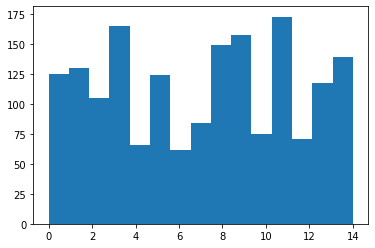

In [54]:
#label distribution
plt.hist(y_train, bins=15)

### Training on a random n_estimators at first just to see

In [55]:
#initialize and train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=37)
clf.fit(X_train, y_train)

#make predictions
y_pred = clf.predict(X_test)

#evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Accuracy: 0.8178694158075601
Classification Report:
                 precision    recall  f1-score   support

 baseball_pitch       0.65      0.52      0.58        42
 baseball_swing       0.70      0.81      0.75        43
    bench_press       0.92      0.94      0.93        35
           bowl       0.87      0.95      0.90        55
 clean_and_jerk       0.89      0.77      0.83        22
     golf_swing       0.81      0.69      0.74        42
      jump_rope       0.94      0.75      0.83        20
  jumping_jacks       0.78      0.89      0.83        28
         pullup       0.96      0.92      0.94        50
         pushup       0.96      0.96      0.96        53
          situp       0.96      0.92      0.94        25
          squat       0.91      0.90      0.90        58
   strum_guitar       0.96      0.96      0.96        23
tennis_forehand       0.62      0.59      0.61        39
   tennis_serve       0.54      0.66      0.60        47

       accuracy                   

### Testing different n_estimators to see the most optimal one

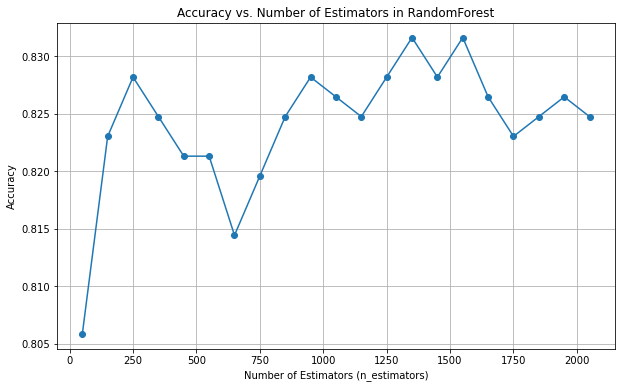

In [61]:
#define the range of n_estimators to test
n_estimators_range = range(50, 2051, 100)
accuracies = []
best_accuracy = 0
best_n = 0
best_y_pred = None #store best preditctions

for n in n_estimators_range:
    
    clf = RandomForestClassifier(n_estimators=n, random_state=37)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    
    #check if this is the best accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_n = n
        best_y_pred = y_pred


plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, accuracies, marker='o')
plt.xlabel("Number of Estimators (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. Number of Estimators in RandomForest")
plt.grid()
plt.show()

In [62]:
#classification report for the best model
print(f"Best n_estimators: {best_n} with accuracy: {best_accuracy*100:.2f}%")
print("Classification Report for the best model:")
print(classification_report(y_test, best_y_pred, target_names=label_encoder.classes_))


Best n_estimators: 1350 with accuracy: 83.16%
Classification Report for the best model:
                 precision    recall  f1-score   support

 baseball_pitch       0.75      0.57      0.65        42
 baseball_swing       0.73      0.86      0.79        43
    bench_press       0.97      0.89      0.93        35
           bowl       0.91      0.93      0.92        55
 clean_and_jerk       0.95      0.82      0.88        22
     golf_swing       0.76      0.76      0.76        42
      jump_rope       0.83      0.75      0.79        20
  jumping_jacks       0.79      0.93      0.85        28
         pullup       0.96      0.94      0.95        50
         pushup       1.00      0.98      0.99        53
          situp       0.96      0.92      0.94        25
          squat       0.88      0.90      0.89        58
   strum_guitar       0.96      0.96      0.96        23
tennis_forehand       0.59      0.56      0.58        39
   tennis_serve       0.58      0.68      0.63        47